### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 2
### Due: Saturday, Jan 27th at 11.59pm CST
---

## Problem 1

This question is about Monte Carlo integration. A standard Gaussian integral takes the form 

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 .$$

1) Write down the usual form of a Gaussian distribution with $\mu=0$ and $\sigma=\sigma$ that is normalized between $\infty$ and $+\infty$. What is the corresponding form of a half-Gaussian distribution between $0$ and $+\infty$? (Remember that the half-Gaussian distribution must be normalized such that it integrates to one.)

2) Manipulate the above equation such that you can write the left hand side in terms of a normalized half-Gaussian distribution. 

3) Draw $N=10^5$ samples from a $\sigma=3$ normal distribution, mask the samples such that only positive values are accepted, then perform Monte Carlo integration using your equation in (2). Confirm that this *approximately* matches the value computed from the right hand side of the equation. If you don't get approximately matching values then you may have forgotten normalization factors for the Gaussian, or constant factors from translating a normalized Gaussian to a half-Gaussian.

4) Repeat (3) for $N=[10^2,10^3,10^4]$, computing the integral using $100$ different batches of random samples for each $N$. Record all calculated values at all $N$. 

5) Make a plot that shows $\log_{10}N$ along the $x$-axis and the spread between the maximum and minimum Monte Carlo integral values that you get at each $N$ on the $y$-axis. (Note: matplotlib's `fill_between` command is useful for this). Plot a horizontal line on the same figure to show the precise mathematical value. You should see that Monte Carlo integration results in less numerical spread as $N$ gets larger.

1. <font color='lime'>The usual form of a Gaussian distribution with $(\mu=0)$ and $(sigma=\sigma)$ that is normalized between $(-\infty)$ and $(+\infty)$ is given by the probability density function (pdf):

$[ f(x) = \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{x^2}{2\sigma^2}} ]$

For a half-Gaussian distribution between $(0)$ and $(+\infty$), we must normalize it so that the integral from $(0)$ to $(+\infty)$ equals $(1)$. The normalized half-Gaussian distribution is given by:

$[ f(x) = \frac{1}{\sqrt{\pi}\sigma} e^{-\frac{x^2}{\sigma^2}} $]

This is because we need to multiply by $(\frac{1}{2})$ to ensure that the integral from $(0)$ to $(+\infty)$ is $(1)$.

<span style="color:red">SRT: Small error. Multiplying by half is correct, but that would still give a sqrt(2) in the numerator of the pre-factor. -1 point.</span>

2. To write the left-hand side of the given integral in terms of a normalized half-Gaussian distribution:
Using a change of variable substitution:
$(u = \frac{x}{\sqrt{2}\sigma})$, $(du = \frac{1}{\sqrt{2}\sigma}dx)$.

Substitute these into the integral:

$
\int_0^\infty x^3 e^{-\frac{x^2}{2\sigma^2}} \,dx = \int_0^\infty (\sqrt{2}\sigma u)^3 e^{-u^2} \sqrt{2}\sigma \,du
$

Simplified

$
= 2\sigma^4 \sqrt{2} \int_0^\infty u^3 e^{-u^2} \,du
$

Now, the integral $(\int_0^\infty u^3 e^{-u^2} \,du)$ is the integral of the third power of the variable in a normalized half-Gaussian distribution from $(0)$ to $(+\infty)$. 

The normalized half-Gaussian distribution in terms of $(u)$ is $(f(u) = 2u e^{-u^2})$. 

So the integral becomes:
$
= 2\sigma^4 \sqrt{2} \cdot 2\int_0^\infty u e^{-u^2} \,du
$

Now, the integral $(\int_0^\infty u e^{-u^2} \,du)$ is the integral of the variable in a normalized half-Gaussian distribution from $0$ to $+\infty$.

$
= 2\sigma^4 \sqrt{2} \cdot 2 \cdot \frac{1}{2} = 2\sigma^4
$

Now we can write the left-hand side of the given integral in terms of a normalized half-Gaussian distribution as $2\sigma^4$.



<span style="color:red">SRT: Excellent.</span>

### Solution

In [1]:
import numpy as np
from scipy.stats import norm, uniform 
sigma = 3
N = 10**5

# Samples from a half-normal distribution
half_dist = norm(loc=0, scale=sigma)
data = half_dist.rvs(size=N)
data = data[data > 0]

def MonteC(x):
    # Gaussian pdf to half gaussian over the positive interval
    return np.sqrt(np.pi * sigma**2 / 2) * x**3 * half_dist.pdf(x)

# MC integ using #2 
mc_integral = np.sum(MonteC(data) / (half_dist.pdf(data)))/len(data)

# Compute RHS
analyt_int = 2 * sigma**4

print("Monte Carlo integral:", mc_integral)
print("Analytical integral:", analyt_int)


Monte Carlo integral: 162.69141594534892
Analytical integral: 162


N = 100:
Spread between Max and Min Monte Carlo Integrals: 2750.8048195492106
Analytical integral: 162

N = 1000:
Spread between Max and Min Monte Carlo Integrals: 731.7641820364657
Analytical integral: 162

N = 10000:
Spread between Max and Min Monte Carlo Integrals: 195.15145936177282
Analytical integral: 162



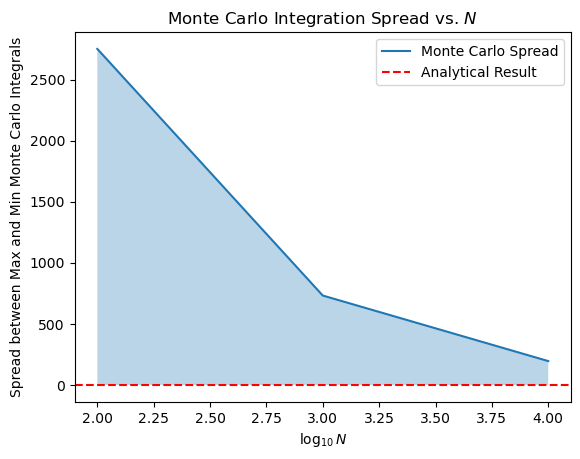

In [4]:
# Repeat 3 
from matplotlib import pyplot as plt

sigma = 3
batch_sizes = [10**2, 10**3, 10**4]
num_batches = 100

mc_results = np.zeros((len(batch_sizes), num_batches))
analyt_results = np.zeros((len(batch_sizes), num_batches))

# Function for MC integ
def MonteC(x):
    return np.sqrt(np.pi * sigma**2 / 2) * x**3 * np.exp(-x**2 / (2 * sigma**2))

# Loop through different batch sizes
for i, N in enumerate(batch_sizes):
    mc_approx = []

    # Run MC integ for each batch
    for j in range(num_batches):
        # Generate samples from a half-normal distribution
        half_dist = norm(loc=0, scale=sigma)
        data = half_dist.rvs(size=N)
        data = data[data > 0]

        # Compute MC integ using the corrected formula
        mc_integral = np.sum(MonteC(data) / (half_dist.pdf(data))) / len(data)
        mc_approx.append(mc_integral)

    # Compute spread for each N
    s_value = np.max(mc_approx) - np.min(mc_approx)

    # Print the results for each N
    print(f"N = {N}:")
    print("Spread between Max and Min Monte Carlo Integrals:", s_value)
    print("Analytical integral:", 2 * sigma**4)
    print()

    # Store results
    mc_results[i, :] = mc_approx
    analyt_results[i, :] = 2 * sigma**4

# Plotting
log_N_values = np.log10(batch_sizes)

plt.plot(log_N_values, np.max(mc_results, axis=1) - np.min(mc_results, axis=1), label='Monte Carlo Spread')
plt.axhline(y=np.max(analyt_results) - np.min(analyt_results), color='red', linestyle='--', label='Analytical Result')

plt.fill_between(log_N_values, np.max(mc_results, axis=1) - np.min(mc_results, axis=1), alpha=0.3)
plt.xlabel(r'$\log_{10}N$')
plt.ylabel('Spread between Max and Min Monte Carlo Integrals')
plt.title('Monte Carlo Integration Spread vs. $N$')
plt.legend()
plt.show()


<span style="color:red">SRT: Overall, very good. As I mentioned in class, you don't need to involve the half-Gaussian pdf anywhere in the Monte Carlo sum, since you have random draws from the half-Gaussian whose density represents the pdf. That's the beauty of Monte Carlo! Also, I wanted to see the band of solutions around the true mathematical value in plot. -1 point.</span>

## Problem 2

This question is about IQ. It's a flawed and questionable metric, but useful for this problem. By definition, IQ is calibrated as a Gaussian distribution with $\mu=100$ and $\sigma=15$. 

1) Create a `scipy.stats` Gaussian object with these properties. Plot the distribution, and print out 10 random draws, along with the pdf at $x=145$. 

2) Access the `cdf` property of the Gaussian object and plot it over the same $x$-range as in (1) but in a different figure. Access the `ppf` property (percent point function) and use *inverse transform sampling* of the cdf to draw $10^4$ random samples, and make a histogram of these. Overplot the pdf from (1). These should match.

3) What fraction of people have IQ > 145? *Hint: investigate all the properties of the Gaussian object from (1) to find the relevant property that gives you this, or perform a calculation involving the cdf.*

4) What IQ corresponds to "one in a million"?

### Solution

10 Random Draws: [ 96.62315736  84.14092122  88.7032029   89.20787477  89.74745379
 114.37365094  98.97331572 113.81630324 115.75839175 126.6174074 ]
PDF at x=145: 0.0002954565607958672


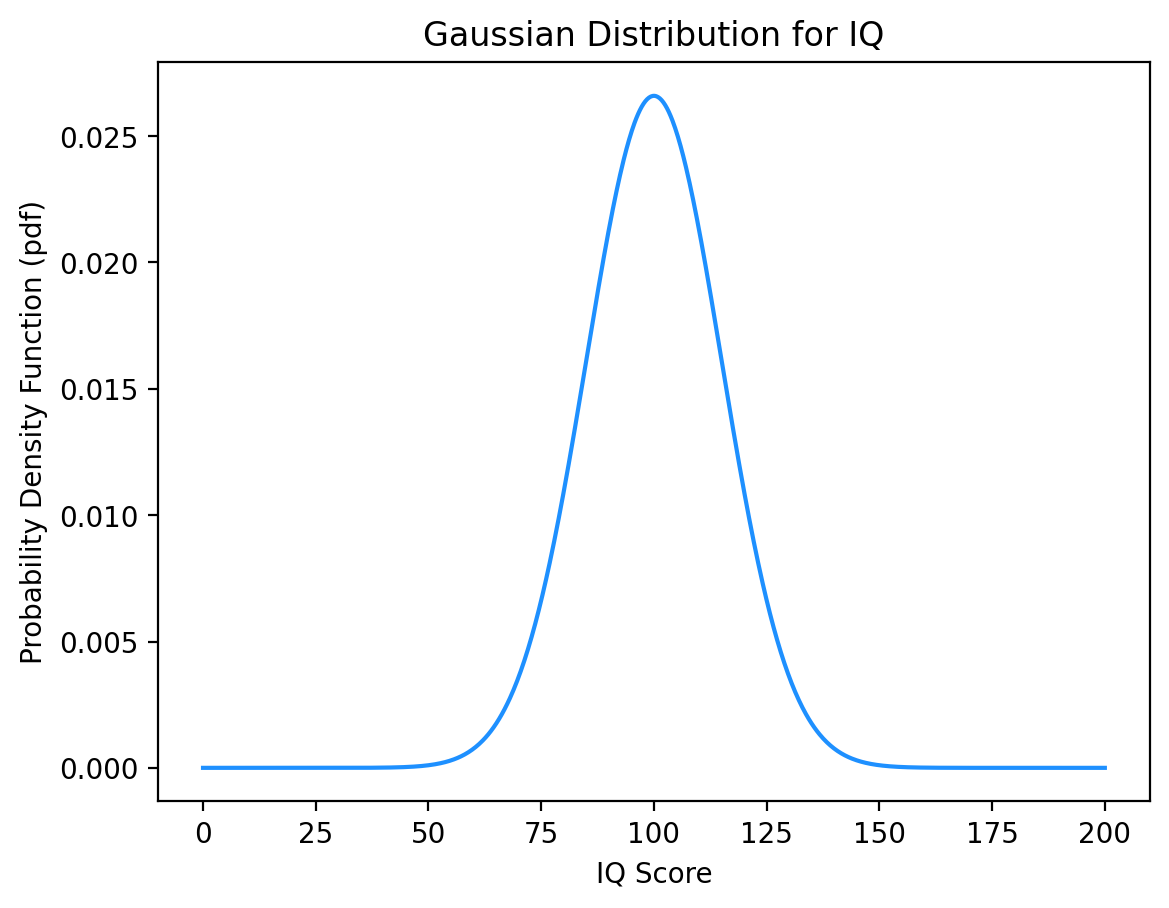

In [68]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats

# Gaussian distribution properties
mu = 100
sigma_iq = 15
N = 10

# Create a scipy.stats Gaussian object
iq_test = scipy.stats.norm(mu, sigma_iq)

# Plot the distribution
xgrid = np.linspace(0,200, 1000)
plt.plot(xgrid, iq_test.pdf(xgrid), color='dodgerblue')
plt.xlabel('IQ Score')
plt.ylabel('Probability Density Function (pdf)')
plt.title('Gaussian Distribution for IQ')

# Print 10 random draws and pdf at x=145
random_draws = iq_test.rvs(size=N)
pdf_at_x145 = iq_test.pdf(145)

print(f'10 Random Draws: {random_draws}')
print(f'PDF at x=145: {pdf_at_x145}')

plt.show()


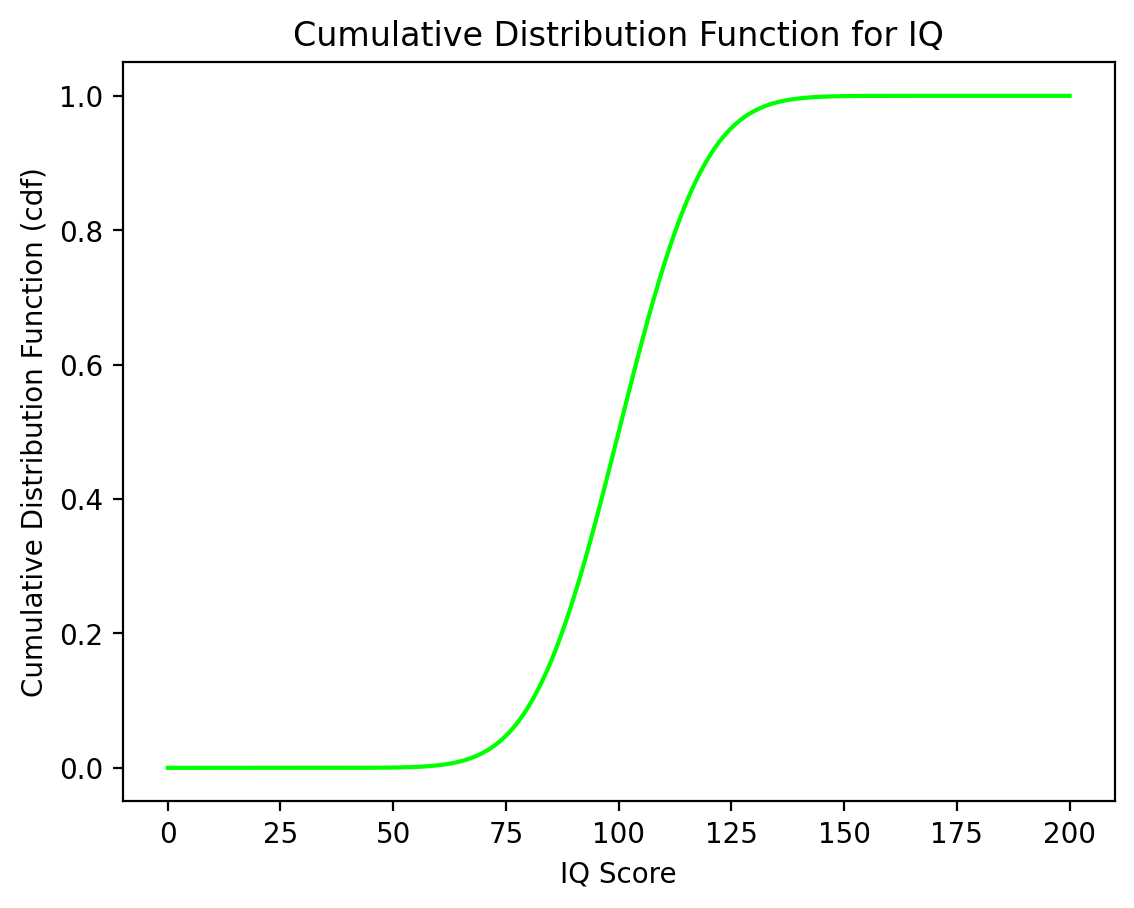

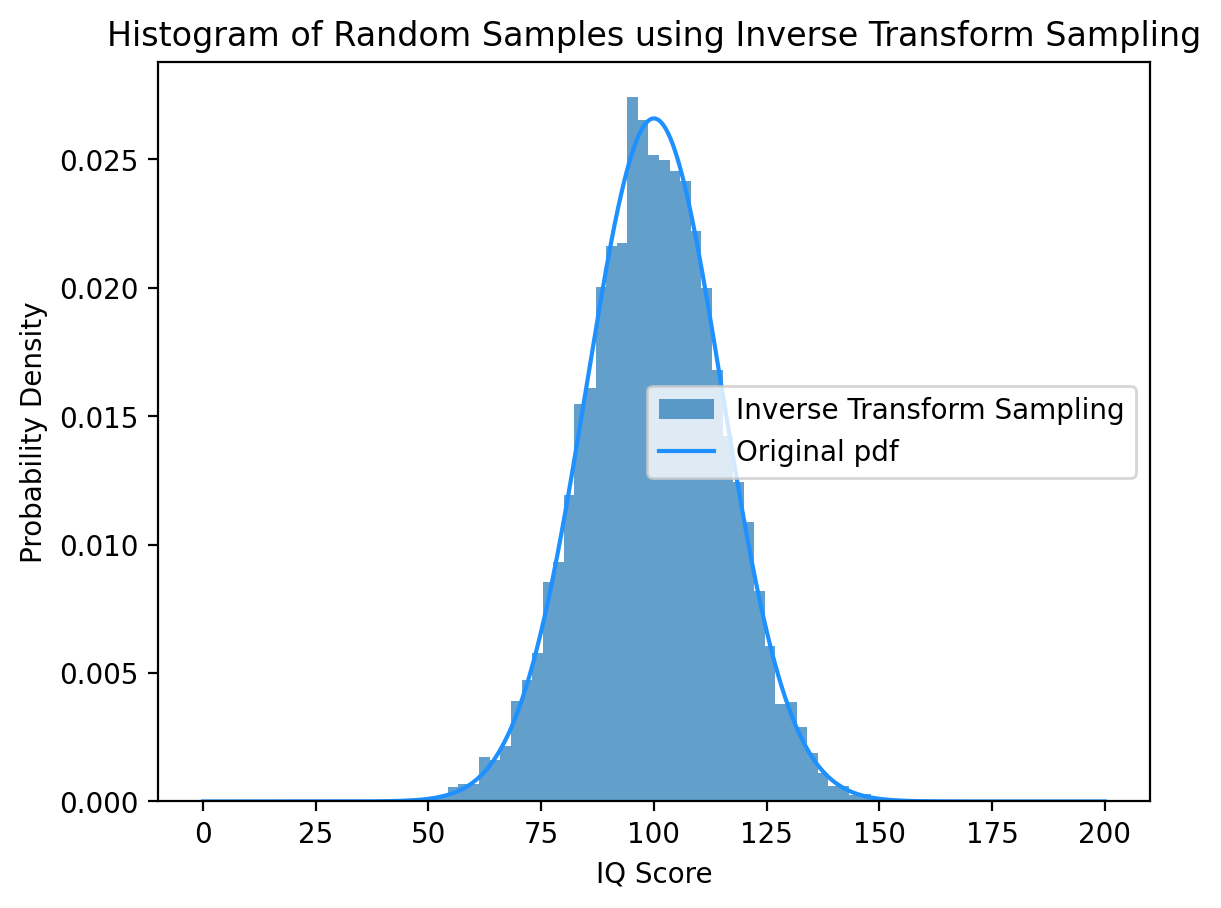

In [69]:
# Plot the cdf
plt.figure()
plt.plot(xgrid, iq_test.cdf(xgrid), color='lime')
plt.xlabel('IQ Score')
plt.ylabel('Cumulative Distribution Function (cdf)')
plt.title('Cumulative Distribution Function for IQ')

# Inverse transform sampling to draw 10^4 random samples
random_samples = iq_test.ppf(np.random.uniform(0, 1, 10**4))

# Plot histogram
plt.figure()
plt.hist(random_samples, bins=50, density=True, alpha=0.7, label='Inverse Transform Sampling')
plt.plot(xgrid, iq_test.pdf(xgrid), color='dodgerblue', label='Original pdf')
plt.xlabel('IQ Score')
plt.ylabel('Probability Density')
plt.title('Histogram of Random Samples using Inverse Transform Sampling')
plt.legend()
plt.show()


In [40]:
# Calculate the probability of an IQ <= 145
fraction_below_145  = iq_test.cdf(145)

# Fraction of people with IQ > 145
fraction_above_145 = 1-fraction_below_145

print(f'Fraction of people with IQ > 145: {fraction_above_145:.4f}')
# IQ corresponding to "one in a million"
iq_one_in_a_million = iq_test.ppf(1 - (1/1000000))

print(f'IQ corresponding to "one in a million": {iq_one_in_a_million:.2f}')


Fraction of people with IQ > 145: 0.0013
IQ corresponding to "one in a million": 171.30


<span style="color:red">SRT: Excellent!</span>

## Problem 3

This question is about Poisson distributions. A famous early application was an analysis of Prussian cavalryman horse-kick deaths by [Bortkiewicz](https://www.wikiwand.com/en/Ladislaus_Bortkiewicz) in 1898. Let's take a short look at the kind of data he analyzed.

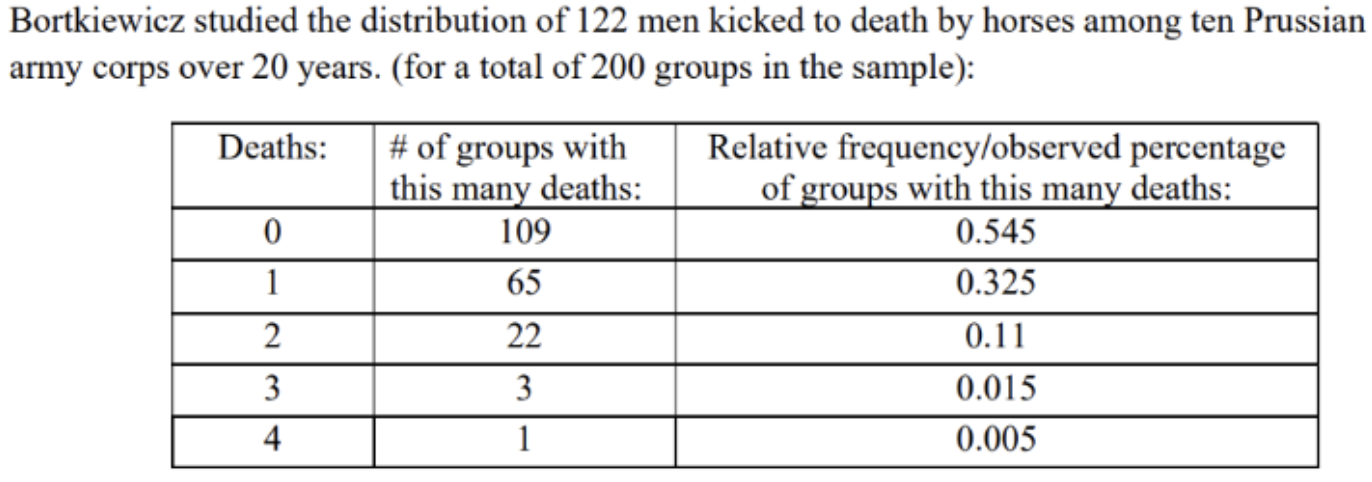

The data essentially consist of 200 total years of Prussian army corps information (i.e. ten army corps over 20 years).

1) Make a plot of the first and third columns of this data.

2) Plot a few Poisson distributions on top that are characterized by different $\mu$ values that might be reasonable guesses for how the data is distributed.

3) We'll come to model fitting next week, but for now use the descriptive sample statistics that you can calculate from this data to deduce the $\mu$ of the modeled Poisson distribution, e.g. the mean, std, median, mode, skewness, and kurtosis, where relevant. Do this however you like, but note that with the data in the table you won't just be able to get a sample mean, since these are tabulated densities, not samples. 

*Hint: use a weighted mean, or alternatively make a dataset that has the numbers 0,1,2,3,4 in agreement with their frequency in the table.*

4) Plot the Poisson distribution with the $\mu$ found in (3) alongside the data.

### Solution

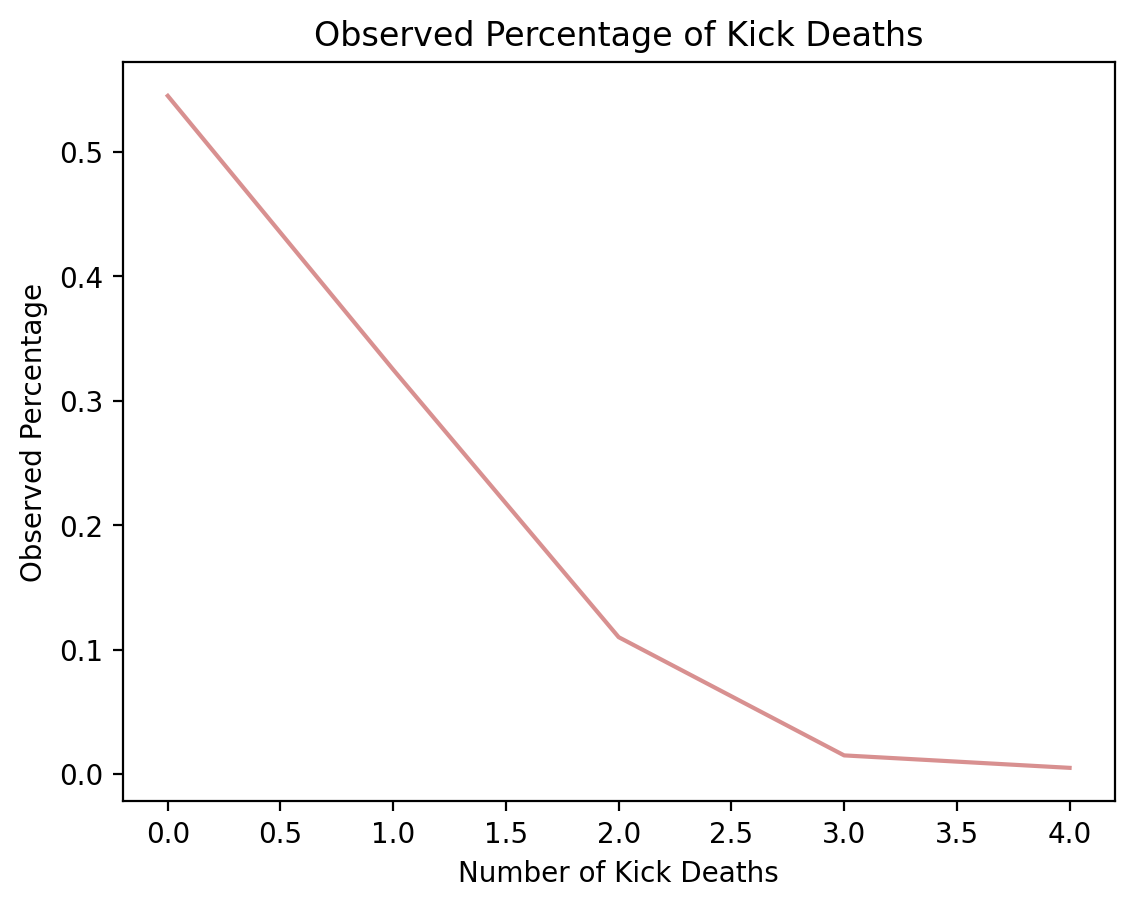

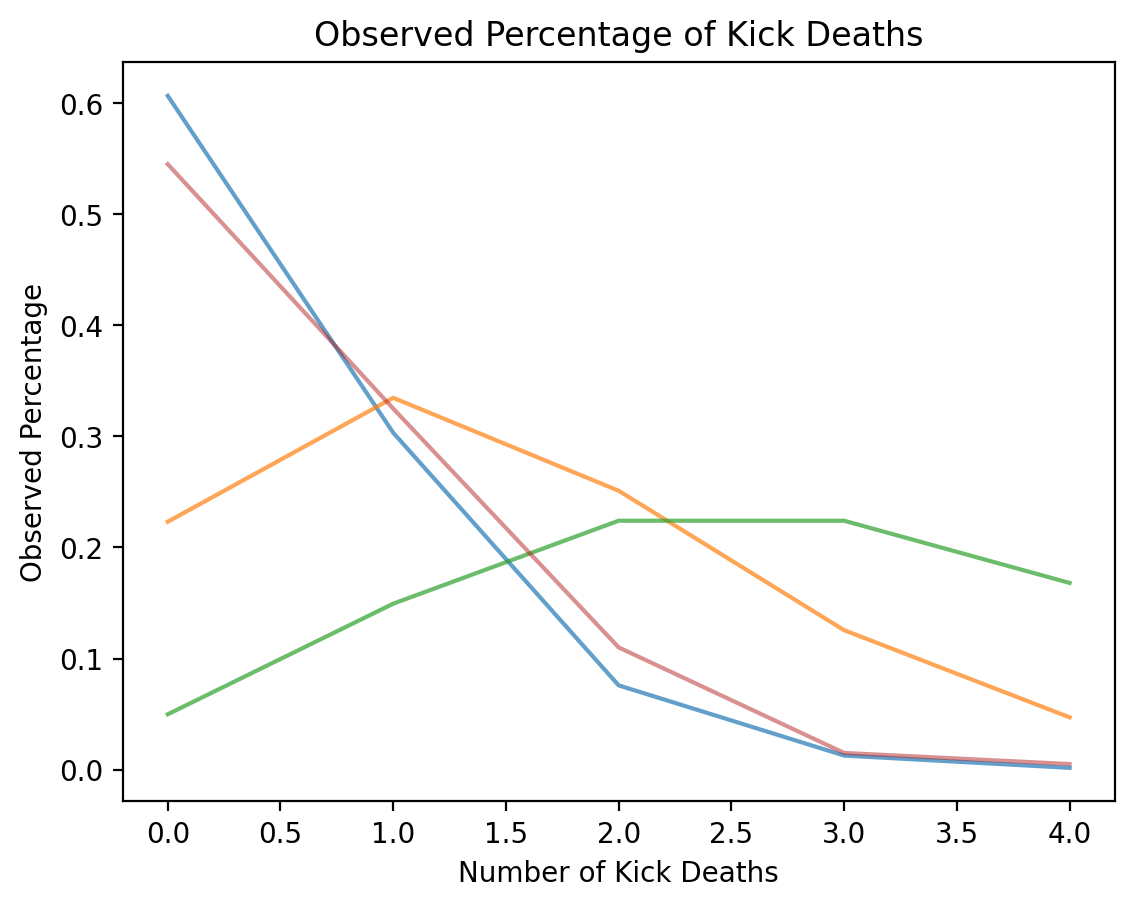

In [36]:
from scipy.stats import poisson
# Deaths and relative frequency/observed percentage of groups with this many deaths 
kick_deaths = [(0,0.545),(1,.325),(2,0.11),(3,0.015),(4,0.005)]

# Extracting data for plotting
deaths, observed_percentages = zip(*kick_deaths)

# Plotting the observed percentages
plt.plot(deaths, observed_percentages, color='firebrick', alpha = 0.5)
plt.xlabel('Number of Kick Deaths')
plt.ylabel('Observed Percentage')
plt.title('Observed Percentage of Kick Deaths')
plt.show()

# Plotting Poisson distributions with different mu values
mu = [0.5, 1.5, 3.0]  # Adjust these values based on your guesses
x_values = np.arange(0, max(deaths) + 1)

for item in mu:
    poisson_values = poisson.pmf(x_values, item)
    plt.plot(x_values, poisson_values, label=f'Poisson (mu={item})', alpha=0.7);

# Plotting the bar plot
plt.plot(deaths, observed_percentages, color='firebrick', alpha = 0.5)
plt.xlabel('Number of Kick Deaths')
plt.ylabel('Observed Percentage')
plt.title('Observed Percentage of Kick Deaths')
plt.show()



In [39]:
# Deaths and observed percentages
kick_deaths = [(0, 0.545), (1, 0.325), (2, 0.11), (3, 0.015), (4, 0.005)]

# Extracting data for statistics calculation
deaths, observed_percentages = zip(*kick_deaths)

# Creating a weighted dataset
weighted_data = np.concatenate([[death] * int(percentage * 1000) for death, percentage in kick_deaths])

# Calculate descriptive statistics
weighted_mean = np.average(weighted_data)
weighted_std = np.sqrt(np.average((weighted_data - weighted_mean) ** 2))
median = np.median(weighted_data)

# Mode (most frequent value)
unique, counts = np.unique(weighted_data, return_counts=True)
mode_value = unique[np.argmax(counts)]

# Skewness and Kurtosis
skewness = np.mean((weighted_data - weighted_mean) ** 3) / np.power(weighted_std, 3)
kurtosis = np.mean((weighted_data - weighted_mean) ** 4) / np.power(weighted_std, 4) - 3

# Print the results
print(f'Weighted Mean: {weighted_mean:.2f}')
print(f'Weighted Standard Deviation: {weighted_std:.2f}')
print(f'Median: {median}')
print(f'Mode: {mode_value}')
print(f'Skewness: {skewness:.2f}')
print(f'Kurtosis: {kurtosis:.2f}')


Weighted Mean: 0.61
Weighted Standard Deviation: 0.78
Median: 0.0
Mode: 0
Skewness: 1.25
Kurtosis: 1.45


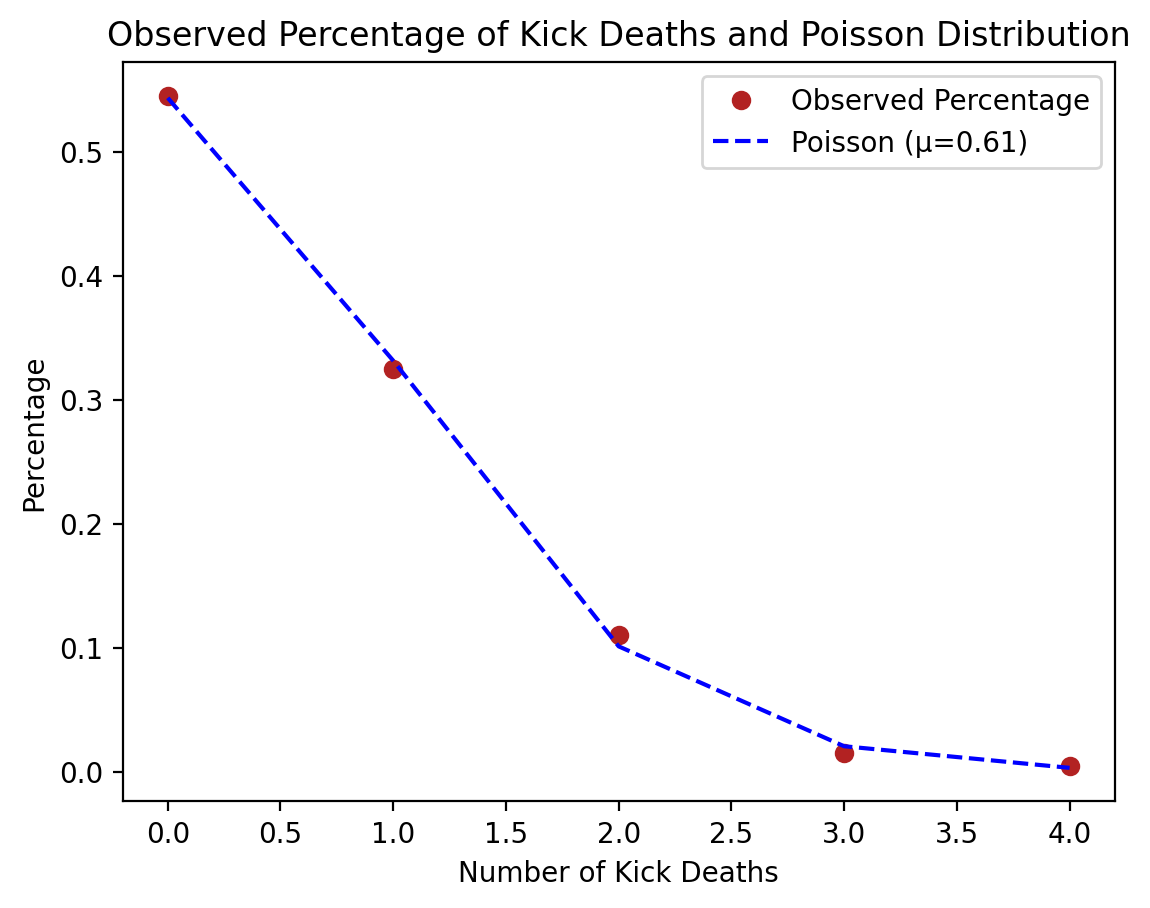

In [38]:

# Deaths and observed percentages
kick_deaths = [(0, 0.545), (1, 0.325), (2, 0.11), (3, 0.015), (4, 0.005)]

# Calculate descriptive statistics
weighted_mean = np.average(weighted_data)

# Plotting the observed percentages
plt.plot(deaths, observed_percentages, color='firebrick', marker='o', linestyle='', label='Observed Percentage')

# Plotting Poisson distribution with calculated μ
x_values = np.arange(0, max(deaths) + 1)
poisson_values = poisson.pmf(x_values, weighted_mean)
plt.plot(x_values, poisson_values, label=f'Poisson (μ={weighted_mean:.2f})', linestyle='--', color='blue')

plt.xlabel('Number of Kick Deaths')
plt.ylabel('Percentage')
plt.title('Observed Percentage of Kick Deaths and Poisson Distribution')
plt.legend()
plt.show()


<span style="color:red">SRT: Excellent! Your weighted mean can also be given by just doing a sum of the deaths times the frequency.</span>